In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load video
import skvideo.io
import skvideo.datasets
vid_data = skvideo.io.vread('../video/c6lc01201a6.avi')
n_frames, frame_height, frame_width, n_channels = vid_data.shape

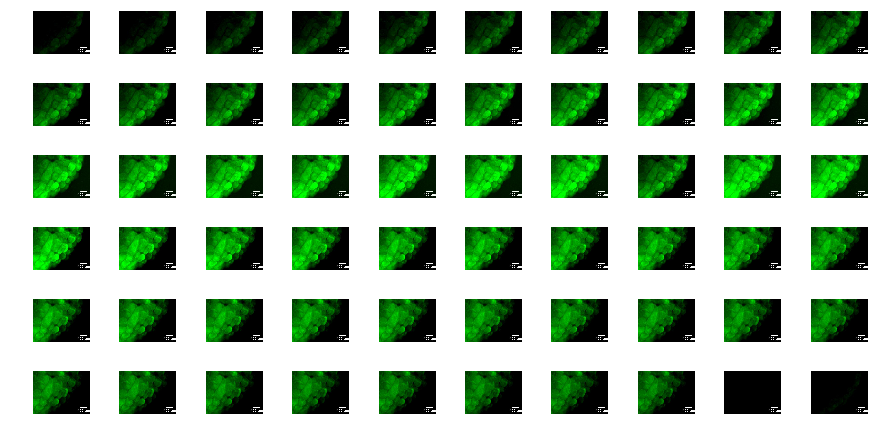

In [3]:
# plot frames
fig,ax = plt.subplots(6,10,figsize=(12,6))
for i in range(n_frames):
    j,k = i/10, i%10
    ax[j,k].imshow(vid_data[i])
    ax[j,k].set_xlim(0,frame_width)
    ax[j,k].set_ylim(frame_height,0)
    ax[j,k].axis('off')
plt.tight_layout(pad=0)

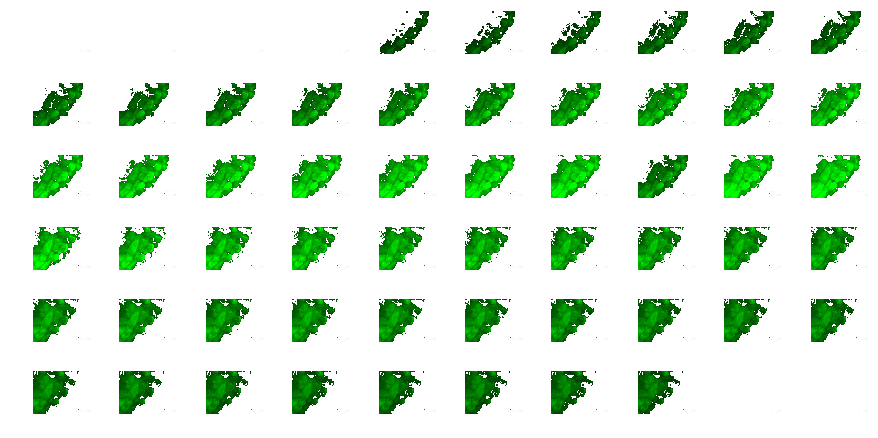

In [4]:
from skimage import filters
from skimage.color import rgb2gray

# remove background
background = ['' for i in range(n_frames)]
fig,ax = plt.subplots(6,10,figsize=(12,6))
for i in range(n_frames):
    j,k = i/10, i%10
    frame_data = vid_data[i]
    gray_frame = rgb2gray(frame_data)
    background[i] = gray_frame < filters.threshold_otsu(gray_frame)
    frame_data[background[i]] = 255
    ax[j,k].imshow(frame_data)
    ax[j,k].set_xlim(0,frame_width)
    ax[j,k].set_ylim(frame_height,0)
    ax[j,k].axis('off')
plt.tight_layout(pad=0)

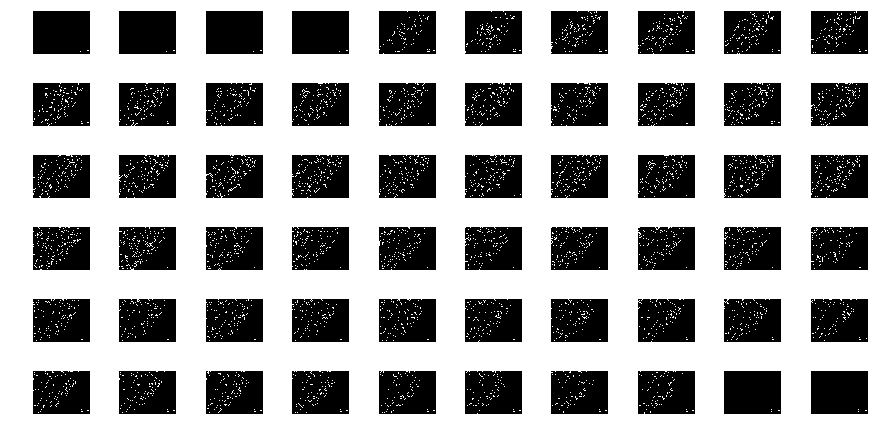

In [5]:
from skimage.color import rgb2gray
from skimage.feature import canny
from scipy import ndimage as ndi

# detect edges
edges = ['' for i in range(n_frames)]
fig,ax = plt.subplots(6,10,figsize=(12,6))
for i in range(n_frames):
    j,k = i/10, i%10
    frame_data = vid_data[i]
    #frame_data[background[i]] = 255
    gray_frame = rgb2gray(frame_data)
    edges[i] = canny(gray_frame)
    #fill_cells = ndi.binary_fill_holes(edges[i])
    ax[j,k].imshow(frame_data)
    ax[j,k].imshow(edges[i], cmap='gray')
    ax[j,k].set_xlim(0,frame_width)
    ax[j,k].set_ylim(frame_height,0)
    ax[j,k].axis('off')
plt.tight_layout(pad=0)

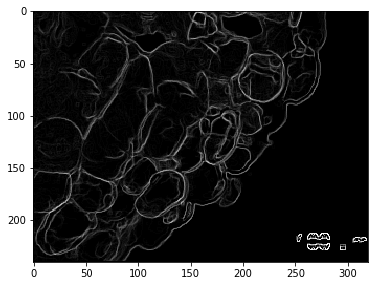

In [6]:
# sum edges
edge_accum = np.zeros_like(edges[0], dtype=int)
for i in range(n_frames):
    edge_accum = edge_accum + edges[i]
#    edge_accum = np.logical_or(edge_accum,edges[i])

plt.figure(figsize=(6,6))
plt.imshow(edge_accum, cmap='gray')